In [1]:
import os
import pandas as pd
from xgboost import XGBClassifier
from funkcije import *

2023/07/28 15:42:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2023/07/28 15:42:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/07/28 15:42:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [2]:
nemci = pd.read_csv("baza_labelirana.csv")

In [6]:
X = nemci[['hurstovi', 'duzine', 'odnos_tišine_i_govora',
 'najduža_priča', 'zcr_prosek', 'zcr_min', 'zcr_max', 'zcr_med', 'zcr_stdev',
 'pitch_prosek', 'pitch_min', 'pitch_max', 'pitch_med', 'pitch_stdev',
 'energija_prosek', 'energija_min', 'energija_max', 'energija_stdev',
 'eng_bez_tis', 'eng_bez_tis_avg', 'eng_bez_tis_min', 'eng_bez_tis_max',
 'eng_bez_tis_med', 'eng_bez_tis_stdev', 'energija_ukupna', 'mfcc_mean_1',
  'mfcc_min_1', 'mfcc_max_1', 'mfcc_med_1', 'mfcc_var_1', 'mfcc_mean_2',
  'mfcc_min_2', 'mfcc_max_2', 'mfcc_med_2', 'mfcc_var_2', 'mfcc_mean_3',
  'mfcc_min_3', 'mfcc_max_3', 'mfcc_med_3', 'mfcc_var_3', 'mfcc_mean_4',
  'mfcc_min_4', 'mfcc_max_4', 'mfcc_med_4', 'mfcc_var_4', 'mfcc_mean_5',
  'mfcc_min_5', 'mfcc_max_5', 'mfcc_med_5', 'mfcc_var_5', 'mfcc_mean_6',
  'mfcc_min_6', 'mfcc_max_6', 'mfcc_med_6', 'mfcc_var_6', 'mfcc_mean_7',
  'mfcc_min_7', 'mfcc_max_7', 'mfcc_med_7', 'mfcc_var_7', 'mfcc_mean_8',
  'mfcc_min_8', 'mfcc_max_8', 'mfcc_med_8', 'mfcc_var_8', 'mfcc_mean_9',
  'mfcc_min_9', 'mfcc_max_9', 'mfcc_med_9', 'mfcc_var_9', 'mfcc_mean_10',
  'mfcc_min_10', 'mfcc_max_10', 'mfcc_med_10', 'mfcc_var_10', 'mfcc_mean_11',
  'mfcc_min_11', 'mfcc_max_11', 'mfcc_med_11', 'mfcc_var_11', 'mfcc_mean_12',
  'mfcc_min_12', 'mfcc_max_12', 'mfcc_med_12', 'mfcc_var_12', 'mfcc_mean_13',
  'mfcc_min_13', 'mfcc_max_13', 'mfcc_med_13', 'mfcc_var_13', 'mfcc_mean_14',
  'mfcc_min_14', 'mfcc_max_14', 'mfcc_med_14', 'mfcc_var_14', 'mfcc_mean_15',
  'mfcc_min_15', 'mfcc_max_15', 'mfcc_med_15', 'mfcc_var_15', 'mfcc_mean_16',
  'mfcc_min_16', 'mfcc_max_16', 'mfcc_med_16', 'mfcc_var_16', 'mfcc_mean_17',
  'mfcc_min_17', 'mfcc_max_17', 'mfcc_med_17', 'mfcc_var_17', 'mfcc_mean_18',
  'mfcc_min_18', 'mfcc_max_18', 'mfcc_med_18', 'mfcc_var_18', 'mfcc_mean_19',
  'mfcc_min_19', 'mfcc_max_19', 'mfcc_med_19', 'mfcc_var_19', 'mfcc_mean_20',
  'mfcc_min_20', 'mfcc_max_20', 'mfcc_med_20', 'mfcc_var_20']]

y = nemci[["sve"]]

X = X.values
y = y.values

In [7]:
acc =  []
f1 =   []
acct = []
prec = []
recall =   []
conf_mat = []

k = 20
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    xgb = XGBClassifier(objective='multiclass:softmax', learning_rate = 0.311,max_depth = 3, n_estimators = 500)
    xgb.fit(X_train, y_train)
    
    test_preds = xgb.predict(X_test)
    train_preds = xgb.predict(X_train)


    y_test = list(y_test)
    metrics = get_metrics(y_test, test_preds)



    acc.append(metrics['accuracy'])
    f1.append(metrics['f1'])
    prec.append(metrics['precision'])
    recall.append(metrics['recall'])
    conf_mat.append([y_test,test_preds])

    y_train = list(y_train)



    dataset = mlflow.data.from_numpy(X_test)
    mlflow.log_input(dataset, context="testing")
    mlflow.log_metrics(metrics)

    m1 = get_metrics(y_train, train_preds)
    acct.append(m1['accuracy'])


mlflow.end_run()


acc_sr = sum(acc)/len(acc)
f1_sr =  sum(f1)/len(f1)
acc_std = max(max(acc)-acc_sr, acc_sr-min(acc))
f1_std = max(max(f1)-f1_sr, f1_sr-min(f1))

print(acc_sr, acc_std)
print(f1_sr, f1_std)
print("max acc:", max(acc))
print("min acc:", min(acc))
print("avg precision", sum(prec)/len(prec))
print("min precision:", min(prec) )
print("max precision:", max(prec) )
print("avg recall:", sum(recall)/len(recall))
print("min recall:",    min(recall) )
print("max recall:",    max(recall) )

print("\n Matrica konfuzije za max tacnost:", max(acc))

2023/07/28 15:51:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a5db9c8d136d4339b8367ef342b19311', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2023/07/28 15:51:56 ERROR mlflow.xgboost: Failed to log feature importance plot. XGBoost autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "/home/zarko/.local/lib/python3.9/site-packages/mlflow/xgboost/__init__.py", line 665, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "/home/zarko/.local/lib/python3.9/site-packages/mlflow/xgboost/__init__.py", line 564, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "/home/zarko/.local/lib/python3.9/site-packages/mlflow/tracking/fluent.py", line 877, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "/home/zarko/.local/lib/python3.9/site-

0.6267080745341614 0.08012422360248439
0.5958588163308253 0.08009256725597647
max acc: 0.7018633540372671
min acc: 0.546583850931677
avg precision 0.6168469553947821
min precision: 0.539864757105349
max precision: 0.6832361630596349
avg recall: 0.5969563968782695
min recall: 0.5397262130658714
max recall: 0.6770156964256343

 Matrica konfuzije za max tacnost: 0.7018633540372671


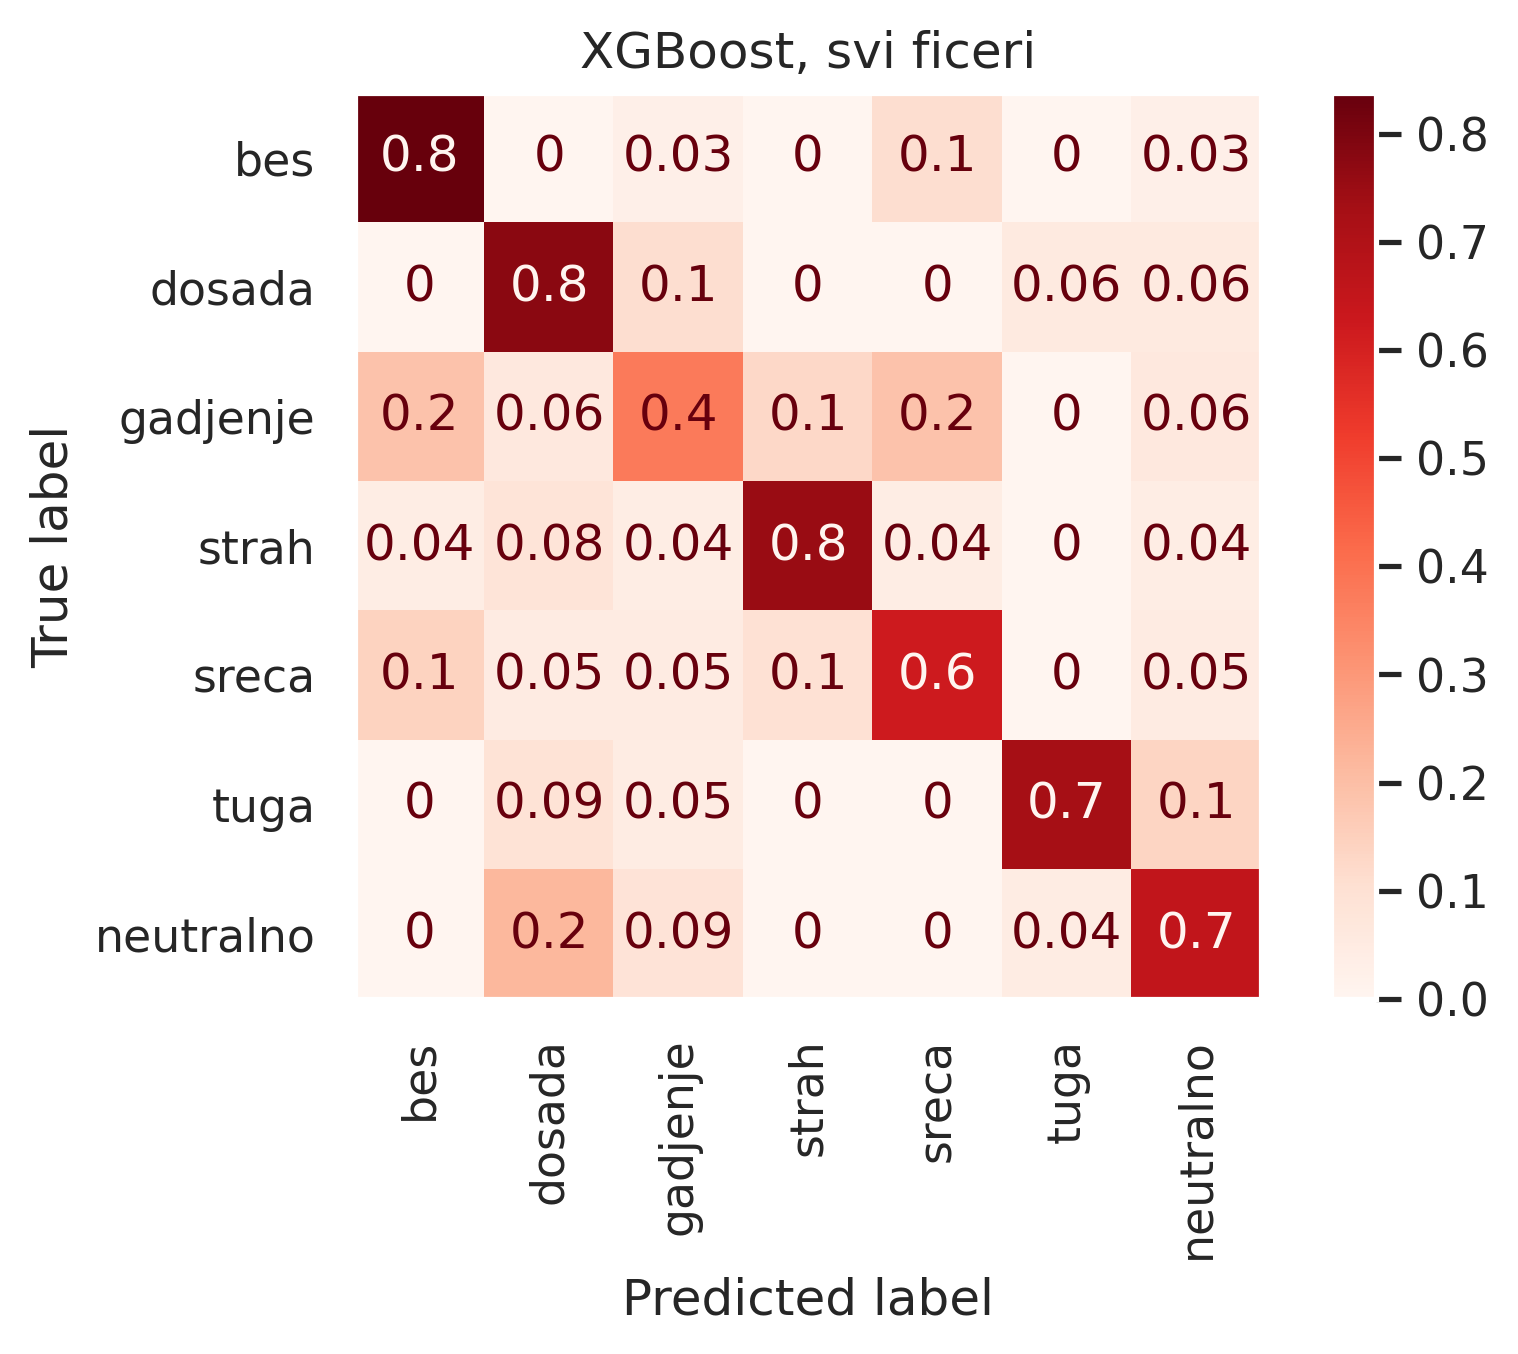

In [16]:
min_conf = conf_mat[acc.index(max(acc))]


plt.grid
ConfusionMatrixDisplay.from_predictions(min_conf[0], min_conf[1],
   display_labels=["bes", "dosada", "gadjenje", "strah", "sreca", "tuga", "neutralno"],
   xticks_rotation="vertical",
   cmap=plt.cm.Reds,
   values_format = ".1g",
   # ,
   normalize="true")
plt.title("XGBoost, svi ficeri")
plt.grid(False)


In [6]:
test_acc = accuracy_score(y_test, test_preds)
print(test_acc)

0.5900621118012422


In [7]:
train_acc = accuracy_score(y_train, train_preds)
print(train_acc)

1.0


In [8]:
# print ((cross_val_score(xgb, X_test, y_test, cv=20)))


/home/zarko/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(
2023/07/27 21:41:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2e921fb73222413790607619ad849072', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2023/07/27 21:41:15 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under /home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija/mlruns/0/2e921fb73222413790607619ad849072/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2023/07/27 21:41:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b54bc1dd18054db7ae8aab4db1769d38', which wil

[0.55555556 0.75       0.375      0.5        0.375      0.875
 0.625      0.5        0.625      0.25       0.75       0.5
 0.875      0.625      0.625      0.875      0.625      0.625
 0.5        0.5       ]
